<a href="https://colab.research.google.com/github/bholistika/DataMining/blob/main/Module3_bpf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Malika Brown
# Tia Robbins
# Marjorie Gilles
# Barbara Fernandez


In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Replace the URL with the path to your dataset
df = pd.read_csv('https://raw.githubusercontent.com/trob001/Modulee3/refs/heads/main/ecom_data_rfm.csv')

# Display the first few rows of your data
df.head()

,Unnamed: 0,CustomerID,Frequency,Recency,Monetary,rankR,rankF,rankM,groupRFM,Country,Customer_Segment
0,1,12346,2,358,2.08,2,1,1,211,United Kingdom,Lost Lowest
1,2,12347,182,35,481.21,5,4,3,543,Iceland,Loyal Customers
2,3,12348,31,108,178.71,5,1,2,512,Finland,Potential Loyalist
3,4,12349,73,51,605.10,5,2,4,524,Italy,Recent High Spender
4,5,12350,17,343,65.30,2,1,1,211,Norway,Lost Lowest


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4380 non-null   int64  
 1   CustomerID        4380 non-null   int64  
 2   Frequency         4380 non-null   int64  
 3   Recency           4380 non-null   int64  
 4   Monetary          4380 non-null   float64
 5   rankR             4380 non-null   int64  
 6   rankF             4380 non-null   int64  
 7   rankM             4380 non-null   int64  
 8   groupRFM          4380 non-null   int64  
 9   Country           4380 non-null   object 
 10  Customer_Segment  4326 non-null   object 
dtypes: float64(1), int64(8), object(2)
memory usage: 376.5+ KB


In [ ]:
# Removing duplicates and handling missing values
df.drop_duplicates(inplace=True)
df.dropna(subset=['CustomerID'], inplace=True)


In [ ]:
if 'Frequency' in df.columns and 'Monetary' in df.columns:
    df['Total'] = df['Frequency'] * df['Monetary']
else:
    raise KeyError("Required columns 'Frequency' and 'Monetary' are missing")

In [ ]:
df.sample(5)

,Unnamed: 0,CustomerID,Frequency,Recency,Monetary,rankR,rankF,rankM,groupRFM,Country,Customer_Segment,Total
3129,3130,16570,133,41,437.17,5,3,3,533,United Kingdom,Potential Loyalist,58143.61
3753,3754,17432,48,51,121.31,5,1,1,511,United Kingdom,New Customers,5822.88
862,863,13483,10,98,10.56,5,1,1,511,United Kingdom,New Customers,105.60
28,29,12378,219,162,656.44,4,4,4,444,Switzerland,Loyal Customers,143760.36
2883,2884,16229,47,120,158.15,4,1,1,411,United Kingdom,Promising,7433.05


In [ ]:
rfm = df.groupby('CustomerID').agg({'Recency': 'sum', 'Frequency': 'sum', 'Monetary': 'sum'})

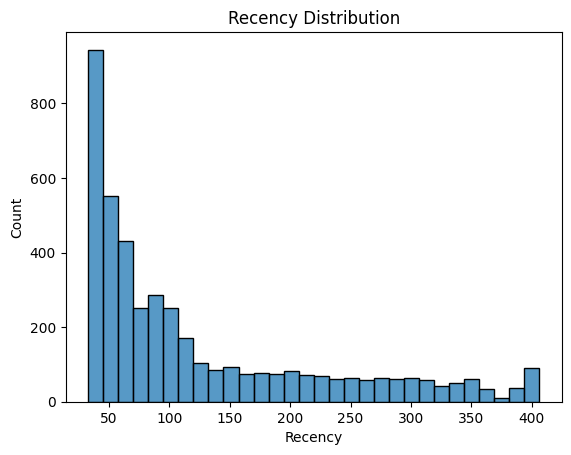

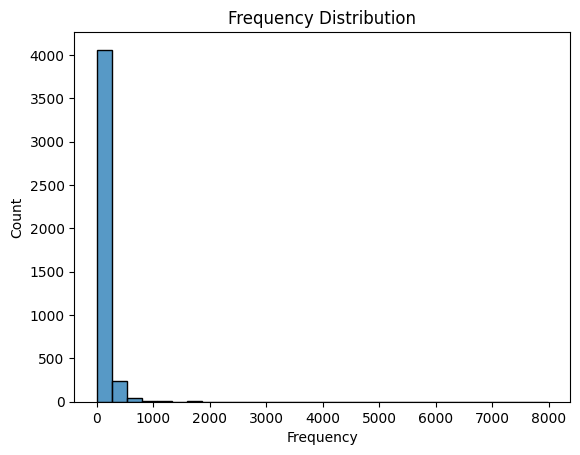

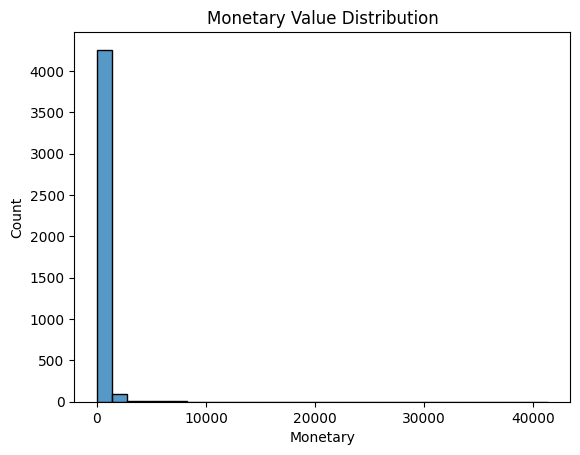

In [ ]:
# Recency distribution
sns.histplot(data=rfm, x='Recency', bins=30)
plt.title('Recency Distribution')
plt.show()

# Frequency distribution
sns.histplot(data=rfm, x='Frequency', bins=30)
plt.title('Frequency Distribution')
plt.show()

# Monetary distribution
sns.histplot(data=rfm, x='Monetary', bins=30)
plt.title('Monetary Value Distribution')
plt.show()

In [ ]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
rfm_no_outliers = rfm.copy()
rfm_no_outliers = remove_outliers(rfm_no_outliers, 'Frequency')
rfm_no_outliers = remove_outliers(rfm_no_outliers, 'Monetary')

In [ ]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Frequency Distribution (Outliers Removed)')

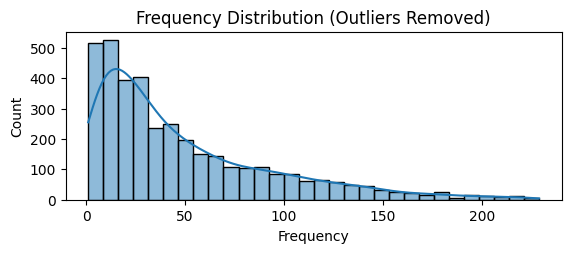

In [ ]:
plt.subplot(2, 1, 1)
sns.histplot(rfm_no_outliers['Frequency'], bins=30, kde=True)
plt.title('Frequency Distribution (Outliers Removed)')

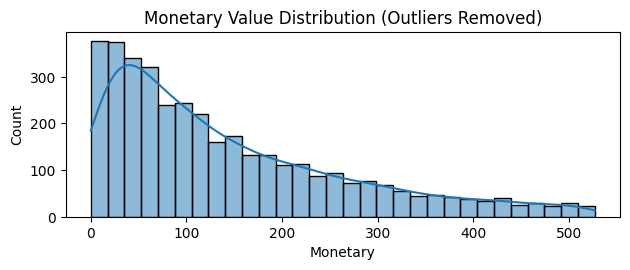

In [ ]:
plt.subplot(2, 1, 2)
sns.histplot(rfm_no_outliers['Monetary'], bins=30, kde=True)
plt.title('Monetary Value Distribution (Outliers Removed)')

plt.tight_layout()
plt.show()


In [ ]:
# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)
rfm['Cluster'] = kmeans.labels_

In [ ]:
# Example thresholds for categorizing clusters
recency_threshold = 50  # days
frequency_threshold = 20  # transactions
monetary_threshold = 1000  # value


In [ ]:
cluster_labels = []
for index, row in rfm.iterrows():
    if row['Recency'] < recency_threshold and row['Frequency'] > frequency_threshold and row['Monetary'] > monetary_threshold:
        cluster_labels.append('Loyal Customers')
    elif row['Recency'] < recency_threshold and row['Frequency'] <= frequency_threshold:
        cluster_labels.append('New Customers')
    elif row['Recency'] >= recency_threshold and row['Frequency'] <= frequency_threshold:
        cluster_labels.append('At-Risk Customers')
    else:
        cluster_labels.append('Lost Customers')

In [ ]:
# Map cluster labels to RFM DataFrame
rfm['ClusterLabel'] = cluster_labels

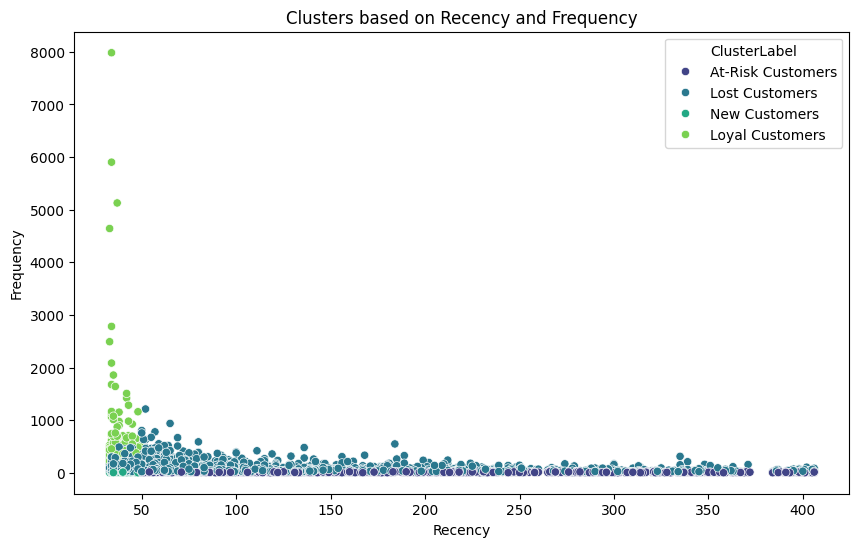

In [ ]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='ClusterLabel', data=rfm, palette='viridis')
plt.title('Clusters based on Recency and Frequency')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Assuming 'rfm' DataFrame is already defined
# Function to export entire row of data for each segment to a text file
def export_customers_to_file(segment_name):
    segment = rfm[rfm['ClusterLabel'] == segment_name]
    # Convert the entire DataFrame segment to a string
    customer_data_text = f"Data for {segment_name}:\n" + segment.to_string(index=False)


In [ ]:
# List of customer segments
segments = ['Loyal Customers', 'New Customers', 'At-Risk Customers', 'Lost Customers']

In [ ]:
# Export entire row of data for each segment
for segment in segments:
    export_customers_to_file(segment)

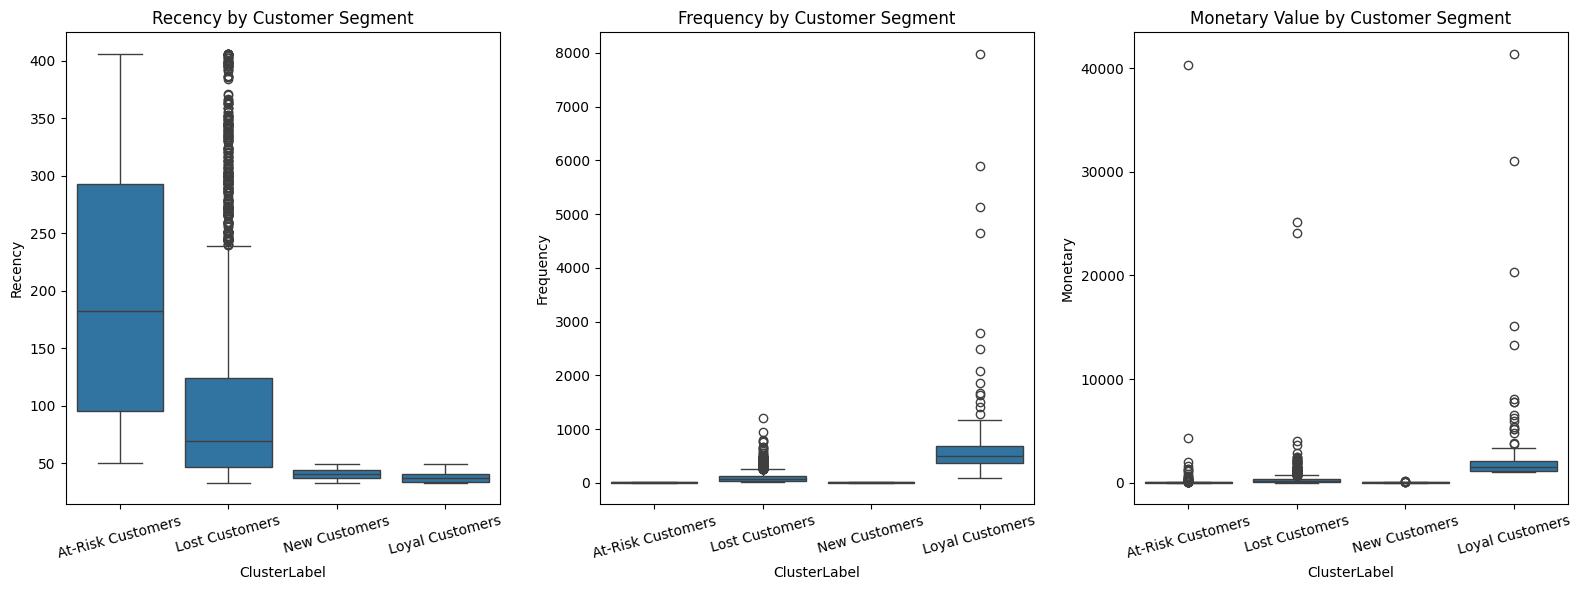

In [ ]:
# Improve the layout of the plots to prevent crowding
plt.figure(figsize=(16, 6))

# Recency Box Plot
plt.subplot(1, 3, 1)
sns.boxplot(x='ClusterLabel', y='Recency', data=rfm)
plt.title('Recency by Customer Segment')
plt.xticks(rotation=15)

# Frequency Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x='ClusterLabel', y='Frequency', data=rfm)
plt.title('Frequency by Customer Segment')
plt.xticks(rotation=15)

# Monetary Value Box Plot
plt.subplot(1, 3, 3)
sns.boxplot(x='ClusterLabel', y='Monetary', data=rfm)
plt.title('Monetary Value by Customer Segment')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

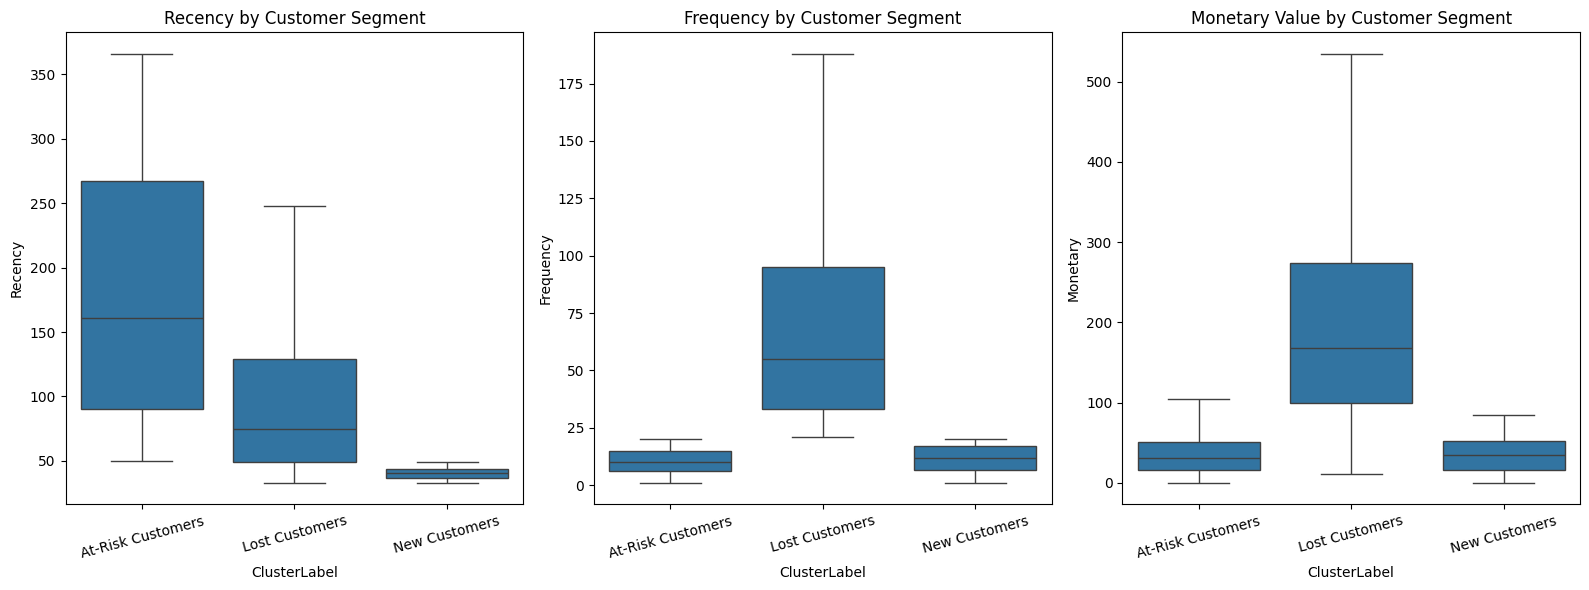

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'rfm' DataFrame is already defined
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the 'Recency', 'Frequency', and 'MonetaryValue' columns
rfm_no_outliers = rfm.copy()
rfm_no_outliers = remove_outliers(rfm_no_outliers, 'Recency')
rfm_no_outliers = remove_outliers(rfm_no_outliers, 'Frequency')
rfm_no_outliers = remove_outliers(rfm_no_outliers, 'Monetary')

# Improve the layout of the plots and hide outliers in the boxplots
plt.figure(figsize=(16, 6))

# Recency Box Plot without outliers
plt.subplot(1, 3, 1)
sns.boxplot(x='ClusterLabel', y='Recency', data=rfm_no_outliers, showfliers=False)
plt.title('Recency by Customer Segment')
plt.xticks(rotation=15)

# Frequency Box Plot without outliers
plt.subplot(1, 3, 2)
sns.boxplot(x='ClusterLabel', y='Frequency', data=rfm_no_outliers, showfliers=False)
plt.title('Frequency by Customer Segment')
plt.xticks(rotation=15)

# Monetary Value Box Plot without outliers
plt.subplot(1, 3, 3)
sns.boxplot(x='ClusterLabel', y='Monetary', data=rfm_no_outliers, showfliers=False)
plt.title('Monetary Value by Customer Segment')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

CLTV

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/trob001/Modulee3/refs/heads/main/ecom_data_rfm.csv')

# Display the first few rows of your data
df.head()


,Unnamed: 0,CustomerID,Frequency,Recency,Monetary,rankR,rankF,rankM,groupRFM,Country,Customer_Segment
0,1,12346,2,358,2.08,2,1,1,211,United Kingdom,Lost Lowest
1,2,12347,182,35,481.21,5,4,3,543,Iceland,Loyal Customers
2,3,12348,31,108,178.71,5,1,2,512,Finland,Potential Loyalist
3,4,12349,73,51,605.10,5,2,4,524,Italy,Recent High Spender
4,5,12350,17,343,65.30,2,1,1,211,Norway,Lost Lowest


In [ ]:
# Drop rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4380 non-null   int64  
 1   CustomerID        4380 non-null   int64  
 2   Frequency         4380 non-null   int64  
 3   Recency           4380 non-null   int64  
 4   Monetary          4380 non-null   float64
 5   rankR             4380 non-null   int64  
 6   rankF             4380 non-null   int64  
 7   rankM             4380 non-null   int64  
 8   groupRFM          4380 non-null   int64  
 9   Country           4380 non-null   object 
 10  Customer_Segment  4326 non-null   object 
dtypes: float64(1), int64(8), object(2)
memory usage: 376.5+ KB


In [ ]:
df.describe()

,Unnamed: 0,CustomerID,Frequency,Recency,Monetary,rankR,rankF,rankM,groupRFM
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000
mean,2190.500000,15294.421461,93.094749,124.502283,322.253916,4.284703,1.834247,1.884475,448.697260
std,1264.541419,1725.199601,232.281775,100.704755,1283.699497,1.138098,1.270429,1.308669,119.067455
min,1.000000,12346.000000,1.000000,33.000000,0.000000,1.000000,1.000000,1.000000,111.000000
25%,1095.750000,13806.750000,17.000000,49.000000,53.017500,4.000000,1.000000,1.000000,411.000000
50%,2190.500000,15296.500000,42.000000,83.000000,130.265000,5.000000,1.000000,1.000000,511.000000
75%,3285.250000,16776.250000,102.000000,175.000000,303.452500,5.000000,2.000000,2.000000,522.000000
max,4380.000000,18287.000000,7983.000000,406.000000,41376.330000,5.000000,5.000000,5.000000,555.000000


In [ ]:
df = df[df['rankR'] > 0 ]
df = df[df['rankF'] > 0]
df = df[~df['rankM'] > 0]

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
CustomerID,0
Frequency,0
Recency,0
Monetary,0
rankR,0
rankF,0
rankM,0
groupRFM,0
Country,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
CustomerID,0
Frequency,0
Recency,0
Monetary,0
rankR,0
rankF,0
rankM,0
groupRFM,0
Country,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        0 non-null      int64  
 1   CustomerID        0 non-null      int64  
 2   Frequency         0 non-null      int64  
 3   Recency           0 non-null      int64  
 4   Monetary          0 non-null      float64
 5   rankR             0 non-null      int64  
 6   rankF             0 non-null      int64  
 7   rankM             0 non-null      int64  
 8   groupRFM          0 non-null      int64  
 9   Country           0 non-null      object 
 10  Customer_Segment  0 non-null      object 
dtypes: float64(1), int64(8), object(2)
memory usage: 0.0+ bytes


In [ ]:
def find_boundaries(df, variable,q1=0.05,q2=0.95):
    # the boundaries are the quantiles
    lower_boundary = df[variable].quantile(q1) # lower quantile
    upper_boundary = df[variable].quantile(q2) # upper quantile
    return upper_boundary, lower_boundary
def capping_outliers(df,variable):
    upper_boundary,lower_boundary =  find_boundaries(df,variable)
    df[variable] = np.where(df[variable] > upper_boundary, upper_boundary,
                       np.where(df[variable] < lower_boundary, lower_boundary, df[variable]))

In [ ]:
capping_outliers(df,'Frequency')
capping_outliers(df,'Monetary')

In [ ]:
df.describe()

,Unnamed: 0,CustomerID,Frequency,Recency,Monetary,rankR,rankF,rankM,groupRFM
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,Unnamed: 0,CustomerID,Frequency,Recency,Monetary,rankR,rankF,rankM,groupRFM,Country,Customer_Segment


In [ ]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Frequency', 'Recency', 'Monetary', 'rankR',
       'rankF', 'rankM', 'groupRFM', 'Country', 'Customer_Segment'],
      dtype='object')